In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import fligner
from scipy.stats import wilcoxon
from scipy.stats import kruskal

**CARGA DE DATOS**

In [3]:
# carga de datos

heartAttack = pd.read_csv('../data/heart.csv')

In [4]:
len(heartAttack['age'])

303

In [5]:
heartAttack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heartAttack.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Todos los datos son numéricos, no tenemos que hacer ninguna gestion para aplicar algoritmos de limpieza

**LIMPIEZA DE DATOS**

No encontramos valores nullos/nas:

In [6]:
print(heartAttack.isna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [7]:
def boxplots(df,atributo):
    
    _ = plt.figure()
    _ = plt.boxplot(df[atributo])
    _ = plt.title(atributo)
    _ = plt.show()

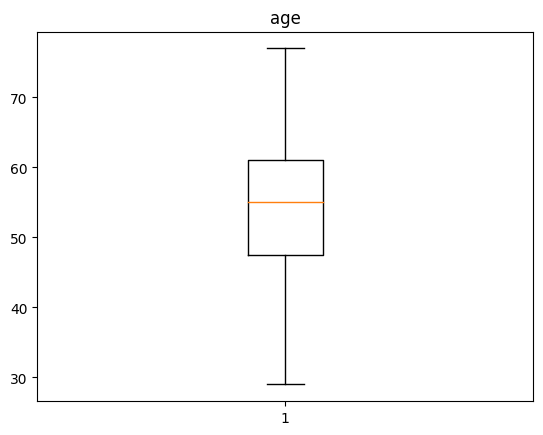

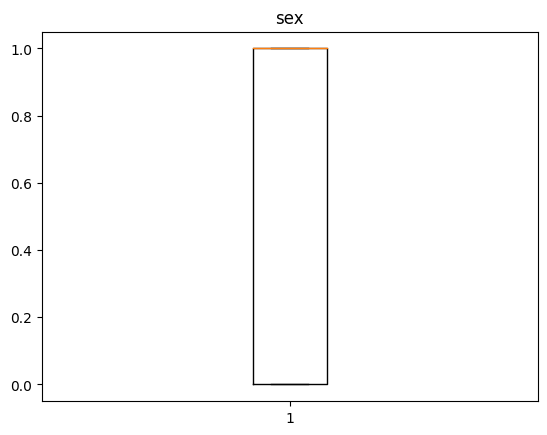

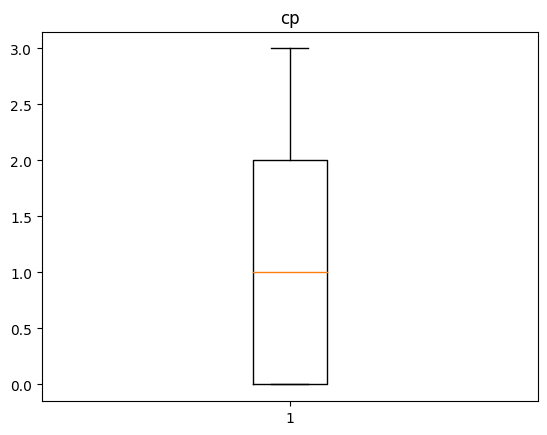

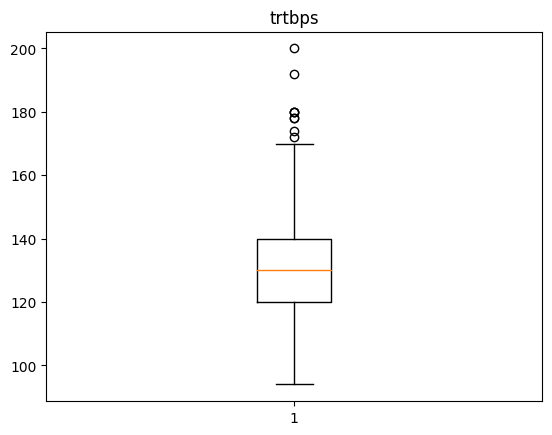

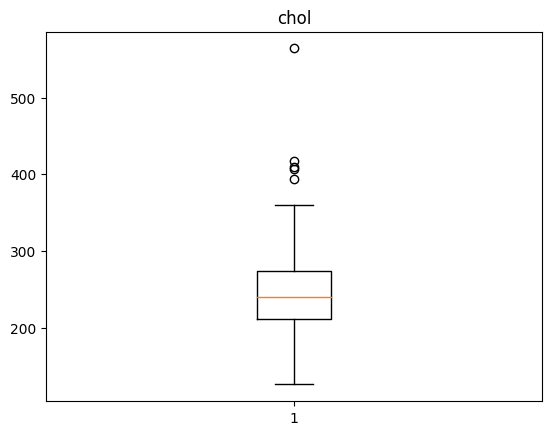

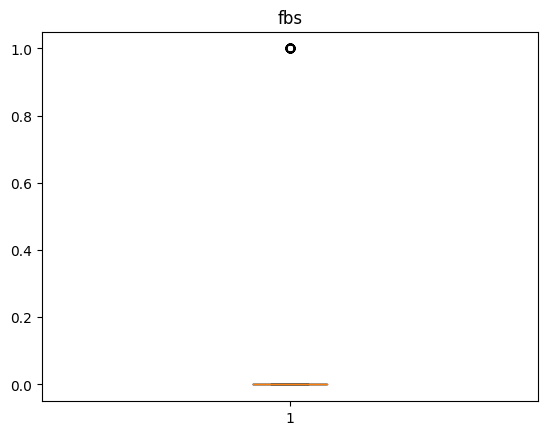

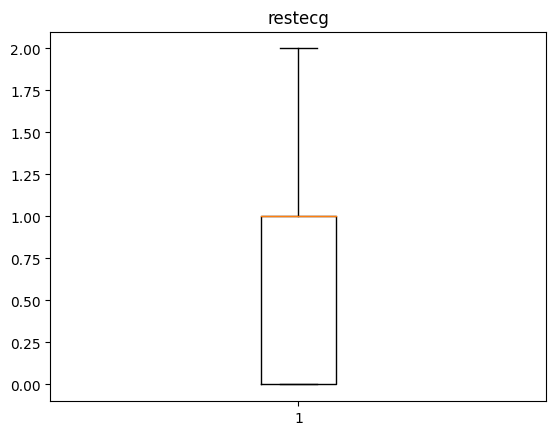

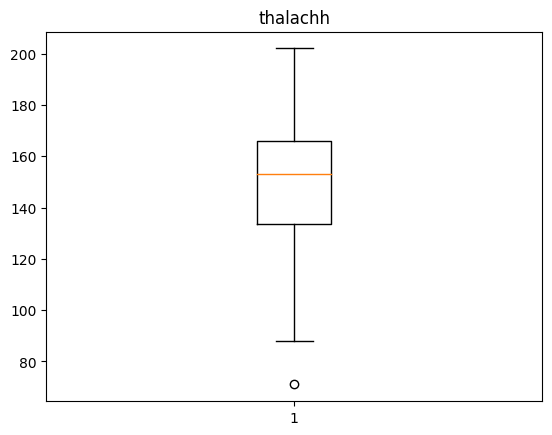

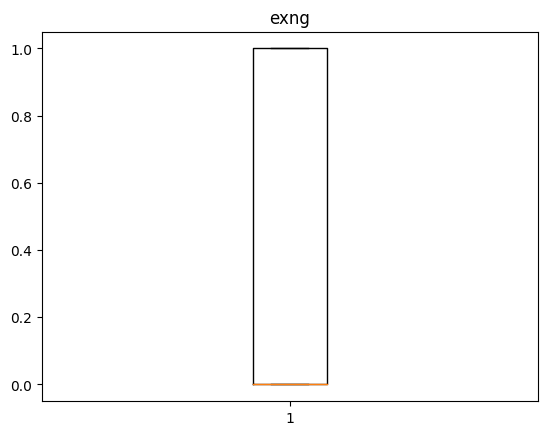

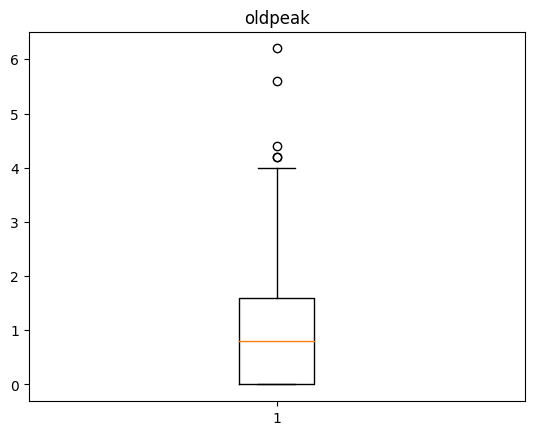

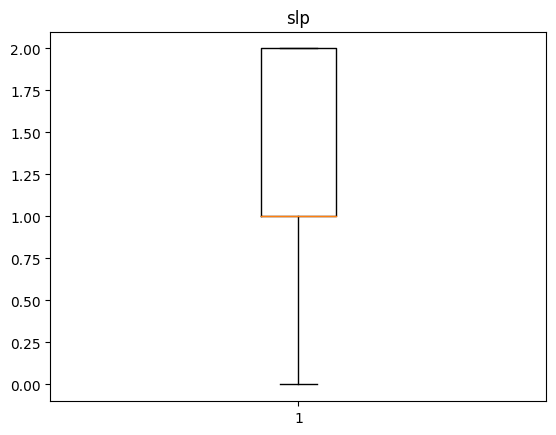

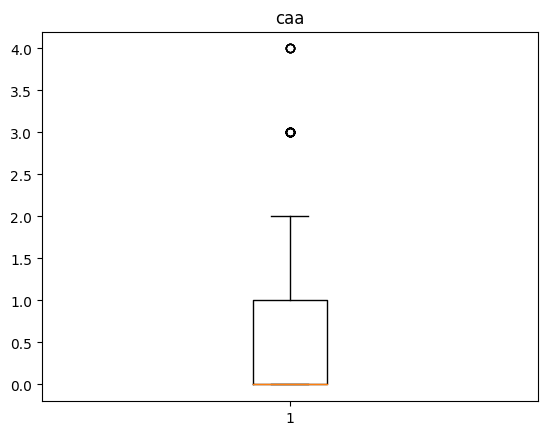

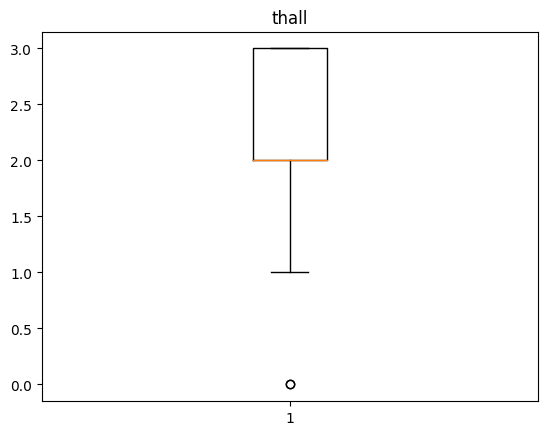

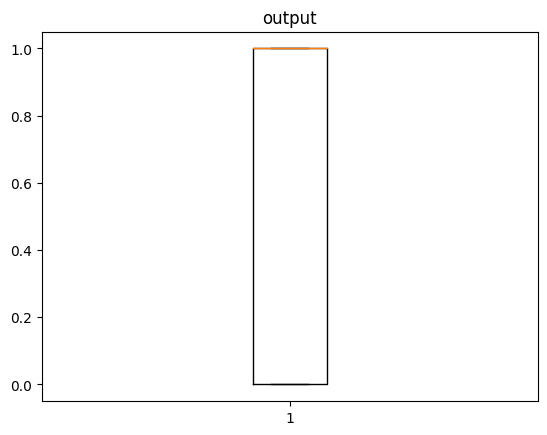

In [8]:
for column in list(heartAttack.columns):
    
    boxplots(df=heartAttack, atributo=column)


**PCA, ANÁLISIS DE LOS COMPONENTES PRINCIPALES**

1- Escalado de datos

In [68]:
features = list(heartAttack.columns)
features.remove('output')


# Obtenemos las variables
x = heartAttack.loc[:, features]

# Obtenemos la variable target
y = heartAttack.loc[:,['output']]

# Escalamos las variables y creamos el modelo
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [69]:
# Se combierte el array a dataframe 
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = features
)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.314203,0.090838,-0.274607,0.183920,0.117375,0.073640,-0.127728,-0.416498,0.361267,0.419639,-0.379772,0.273262,0.222024
1,0.406149,-0.377792,0.297266,0.438187,0.364514,0.317433,-0.220882,0.077876,-0.263118,-0.052255,0.048374,0.094147,-0.200720
2,-0.094077,0.554849,0.356974,0.203849,-0.407825,0.481736,-0.089191,0.158255,-0.126356,0.110343,-0.073818,0.183569,0.125011
3,-0.020662,-0.255309,0.287900,0.022601,-0.343410,-0.068605,0.266096,-0.184125,-0.115056,0.326296,-0.494849,-0.328016,-0.389191
4,-0.307153,0.050704,0.163179,0.188138,0.320067,-0.233442,-0.393667,0.323284,0.034536,0.250579,-0.246823,-0.435365,0.331950
5,-0.128296,0.054969,-0.193411,-0.179460,-0.104730,0.249614,-0.666813,-0.120984,0.230699,-0.170080,-0.064069,-0.182107,-0.508857
6,-0.223730,-0.162507,-0.215390,0.332763,0.049329,0.510818,0.396896,0.101473,0.449919,-0.112888,0.055038,-0.337606,0.055165
7,-0.262477,-0.175992,0.047950,-0.595334,0.372381,0.432863,0.099841,0.143461,-0.112607,0.192323,-0.261807,0.259678,0.034349
8,-0.379000,-0.198925,-0.351432,0.350392,-0.153975,-0.177004,-0.038304,0.372044,-0.058500,0.233603,-0.028505,0.485808,-0.284201
9,-0.016722,0.535619,0.164351,0.071524,0.495170,-0.153696,0.269966,0.030813,0.198732,0.111384,0.055934,0.035325,-0.530831


Código inspirado en: https://www.cienciadedatos.net/documentos/py19-pca-python.html 

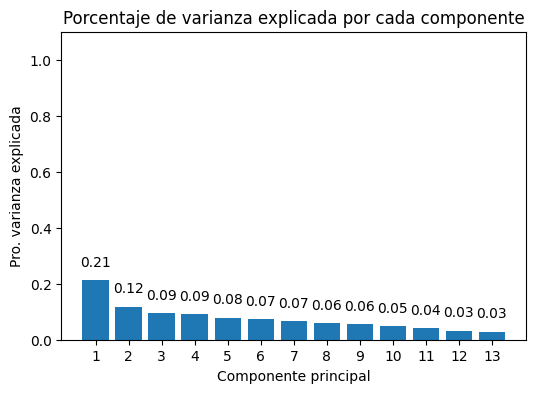

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(x.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Pro. varianza explicada');

Matriz de covarianza

In [8]:
Cov = heartAttack.corr()

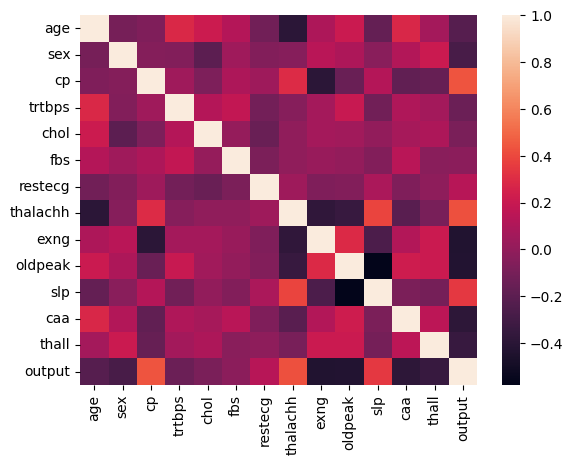

In [14]:
ax = sns.heatmap(Cov)

In [26]:
Cov['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

**Estudio de Normalidad y Homocedasticidad de las variables**

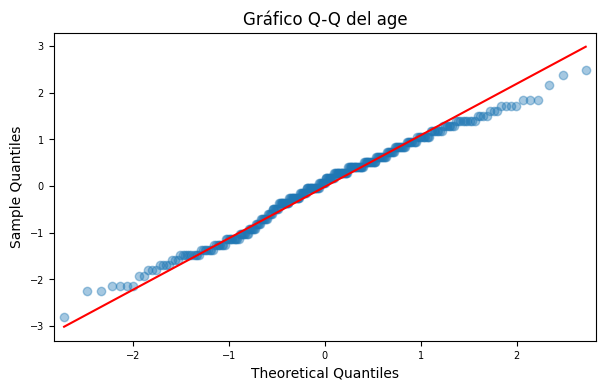

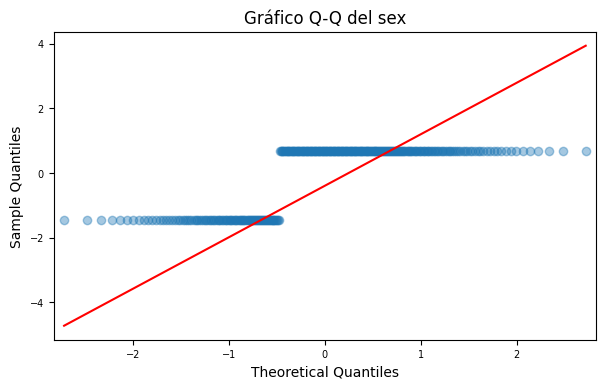

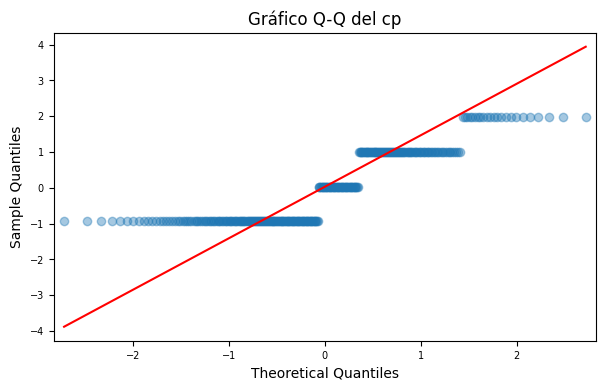

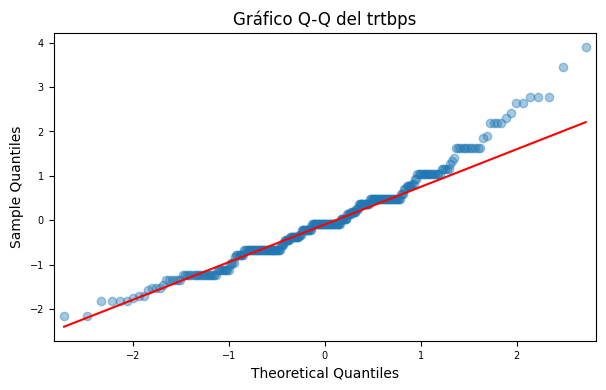

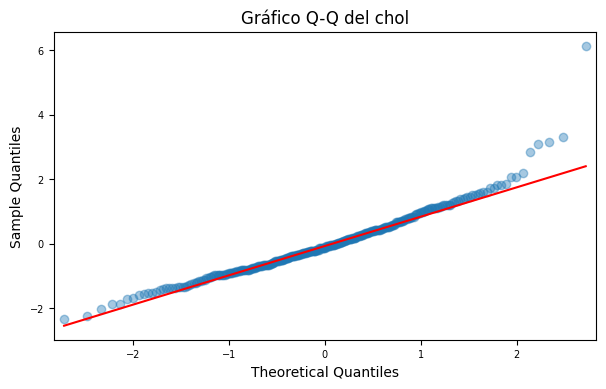

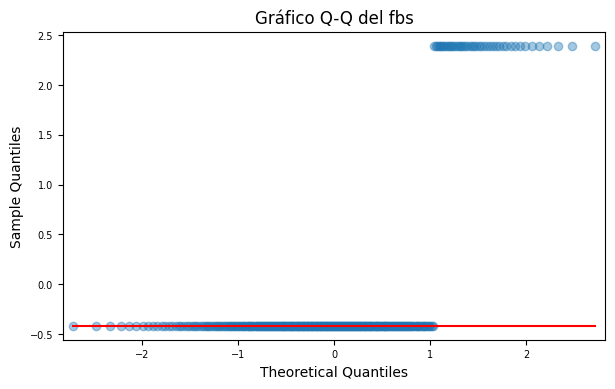

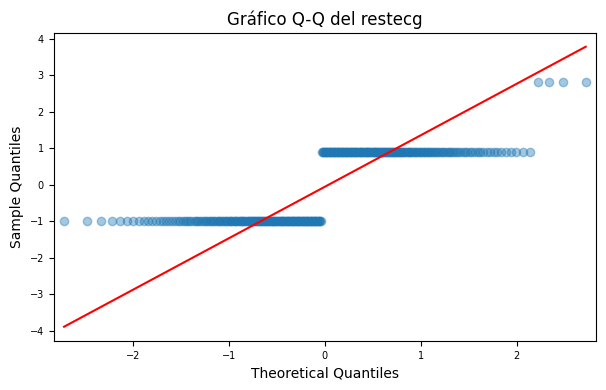

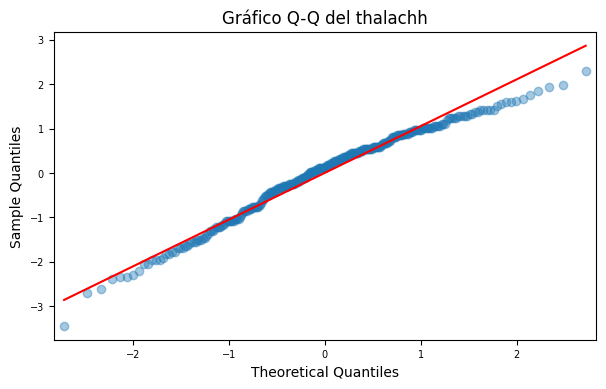

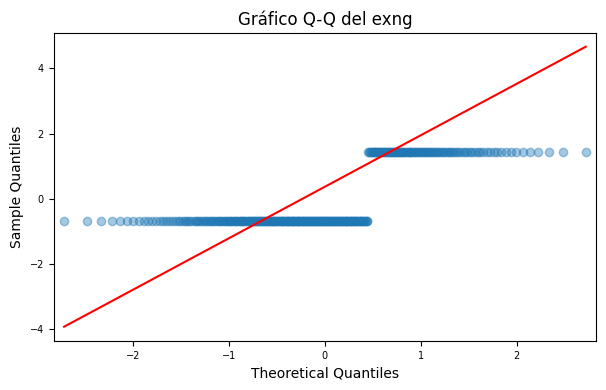

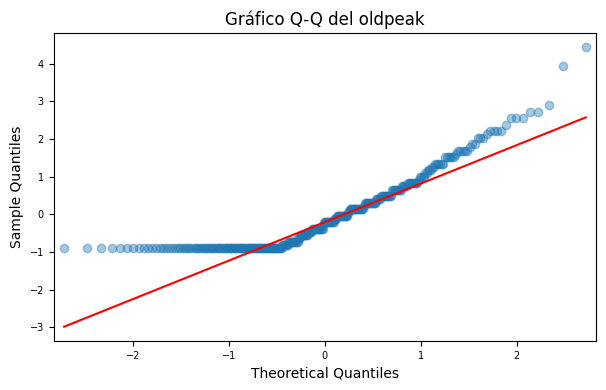

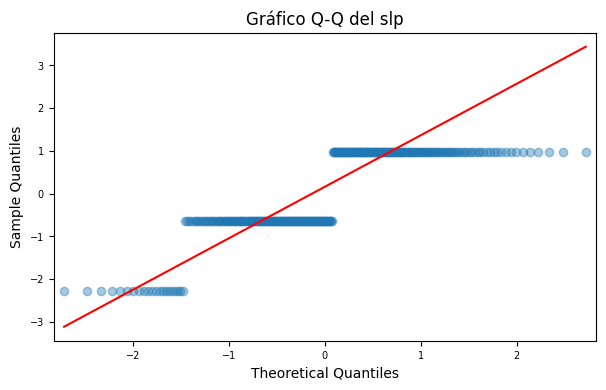

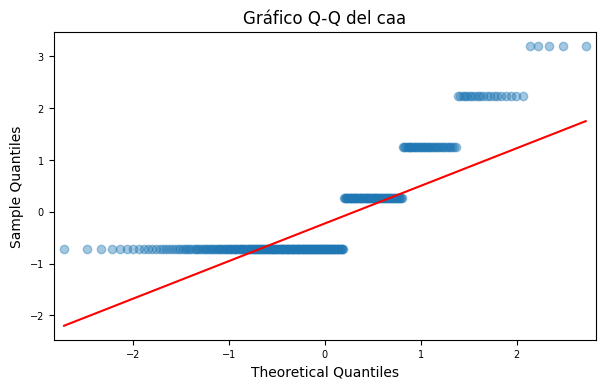

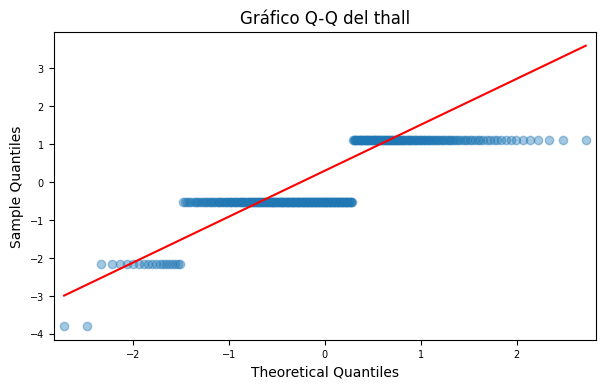

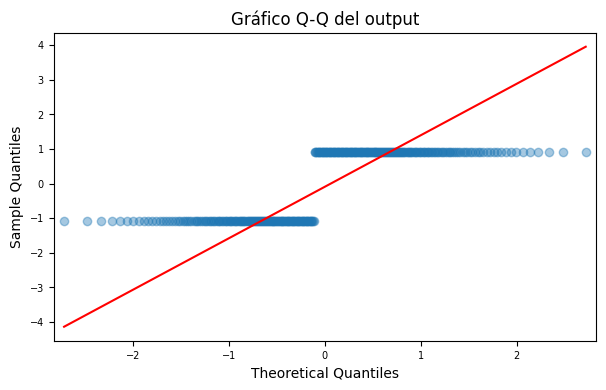

In [33]:
for x in heartAttack.columns:
    fig, ax = plt.subplots(figsize=(7,4))
    sm.qqplot(
        heartAttack[x],
        fit   = True,
        line  = 'q',
        alpha = 0.4,
        lw    = 2,
        ax    = ax
    )
    ax.set_title('Gráfico Q-Q del {}'.format(x))
    ax.tick_params(labelsize = 7)

Shapiro test

In [36]:
shapiro(heartAttack['age'])

ShapiroResult(statistic=0.9863712787628174, pvalue=0.005800595041364431)

Así pues se considera que según la representación grafica previa, las variables qupueden seguir una distribución normal son:

- Age
- 

In [40]:
# Test de DAgostino y Shapiro
for x in heartAttack.columns:
    stat, p = stats.normaltest(heartAttack[x])
    statS, pS = shapiro(heartAttack[x])
    
    # Interpretación
    alpha = 0.05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('AGOSTINO ',x,': Estadisticos=%.3f, p=%.3f' % (stat, p))
        print("    se RECHAZA H0 : ",x, " proviene de una distribución Normal")

    if pS < alpha:
        print('SHAPIRO ',x,': Estadisticos=%.3f, p=%.3f' % (statS, pS))
        print("    se RECHAZA H0 : ",x, " proviene de una distribución Normal")
    
    if pS > alpha:
        print('SHAPIRO ',x,': Estadisticos=%.3f, p=%.3f' % (statS, pS))
        print("    The null hypothesis CANNOT be rejected")
        
    if p > alpha:
        print('AGOSTINO ',x,': Estadisticos=%.3f, p=%.3f' % (stat, p))        
        print("    The null hypothesis cannot be rejected")


AGOSTINO  age : Estadisticos=8.748, p=0.013
    se RECHAZA H0 :  age  proviene de una distribución Normal
SHAPIRO  age : Estadisticos=0.986, p=0.006
    se RECHAZA H0 :  age  proviene de una distribución Normal
AGOSTINO  sex : Estadisticos=947.846, p=0.000
    se RECHAZA H0 :  sex  proviene de una distribución Normal
SHAPIRO  sex : Estadisticos=0.586, p=0.000
    se RECHAZA H0 :  sex  proviene de una distribución Normal
AGOSTINO  cp : Estadisticos=168.439, p=0.000
    se RECHAZA H0 :  cp  proviene de una distribución Normal
SHAPIRO  cp : Estadisticos=0.790, p=0.000
    se RECHAZA H0 :  cp  proviene de una distribución Normal
AGOSTINO  trtbps : Estadisticos=28.568, p=0.000
    se RECHAZA H0 :  trtbps  proviene de una distribución Normal
SHAPIRO  trtbps : Estadisticos=0.966, p=0.000
    se RECHAZA H0 :  trtbps  proviene de una distribución Normal
AGOSTINO  chol : Estadisticos=83.504, p=0.000
    se RECHAZA H0 :  chol  proviene de una distribución Normal
SHAPIRO  chol : Estadisticos=0.947

Las variables no siguen una distribución Normal, para la prueba de homocedasticidad de la varianza se usará una prueba no paramétrica com el test de Fligner-killen.

In [64]:
HAJ = heartAttack[heartAttack['age']>=55]
HAM = heartAttack[heartAttack['age']<55]

In [71]:
fligner(heartAttack[heartAttack['sex']==1]['output'],heartAttack[heartAttack['sex']==0]['output'])

FlignerResult(statistic=10.951079464403477, pvalue=0.0009354909924622863)

In [68]:
fligner(heartAttack[heartAttack['age']>=55]['output'],heartAttack[heartAttack['age']<55]['output'])

FlignerResult(statistic=3.485892926506156, pvalue=0.06189396173947675)

In [72]:
# cp mayor de 1 indica dolor en el pecho
fligner(heartAttack[heartAttack['cp']>=1]['output'],heartAttack[heartAttack['cp']<1]['output'])

FlignerResult(statistic=1.492789809951808, pvalue=0.22178410911219326)

In [73]:
# media de pulsaciones elevadas de 150, mediana 153
fligner(heartAttack[heartAttack['thalachh']>=151]['output'],heartAttack[heartAttack['thalachh']<151]['output'])

FlignerResult(statistic=1.1113188032107524, pvalue=0.29179544958814935)

In [74]:
# oldpeak media 1.039604, mediana 0.8
fligner(heartAttack[heartAttack['oldpeak']>=0.8]['output'],heartAttack[heartAttack['oldpeak']<0.8]['output'])

FlignerResult(statistic=3.1120709996625617, pvalue=0.07771408581442851)

**Contrastes de hipotesis**

In [162]:
stats.kruskal(heartAttack[heartAttack['oldpeak']>=0.8]['output'],heartAttack[heartAttack['oldpeak']<0.8]['output'])


KruskalResult(statistic=48.765659803491, pvalue=2.884462408395387e-12)

In [163]:
stats.kruskal(heartAttack[heartAttack['sex']==1]['output'],heartAttack[heartAttack['sex']==0]['output'])


KruskalResult(statistic=23.835458555307394, pvalue=1.049315707336381e-06)

In [165]:
stats.kruskal(heartAttack[heartAttack['thalachh']>=151]['output'],heartAttack[heartAttack['thalachh']<151]['output'])


KruskalResult(statistic=50.321219935263386, pvalue=1.3053043147691371e-12)

In [178]:
stats.kruskal(heartAttack[heartAttack['age']>=55]['output'],heartAttack[heartAttack['age']<55]['output'])

KruskalResult(statistic=24.776490637852383, pvalue=6.437789525854331e-07)

In [182]:
stats.kruskal(heartAttack[heartAttack['cp']>=1]['output'],heartAttack[heartAttack['cp']<1]['output'])

KruskalResult(statistic=80.41387531440874, pvalue=3.0365545934645777e-19)

In [183]:
stats.kruskal(heartAttack[heartAttack['oldpeak']>=0.8]['output'],heartAttack[heartAttack['oldpeak']<0.8]['output'])

KruskalResult(statistic=48.765659803491, pvalue=2.884462408395387e-12)

In [179]:
stats.kruskal(heartAttack[heartAttack['restecg']>=0.9]['output'],heartAttack[heartAttack['restecg']<0.9]['output'])

KruskalResult(statistic=7.709489923464868, pvalue=0.0054931271135143745)

In [180]:
stats.kruskal(heartAttack[heartAttack['fbs']!=0]['output'],heartAttack[heartAttack['fbs']==0]['output'])

KruskalResult(statistic=0.23754253012080756, pvalue=0.6259866903405821)

In [181]:
stats.kruskal(heartAttack[heartAttack['chol']>=240]['output'],heartAttack[heartAttack['chol']<240]['output'])

KruskalResult(statistic=3.7506659751679092, pvalue=0.052786475630818445)

**Regresion lineal**

In [147]:
def scatterplot(df,atributo1, atributo2):
    fig, ax = plt.subplots(figsize = (15, 9))
    
    _ = ax.scatter(df[atributo1],df[atributo2])
    _ = plt.title((atributo1 ,'vs' ,atributo2))
    # deg=1 means linear fit (i.e. polynomial of degree 1)
    b, a = np.polyfit(df[atributo1], df[atributo2], deg=1)

    # Create sequence of 100 numbers from 0 to 100 
    xseq = np.linspace(min(df[atributo1])-10, max(df[atributo1])+10, 100)
    _ = plt.xlabel(atributo1)
    _ = plt.ylabel(atributo2)
    # Plot regression line
    _ = ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


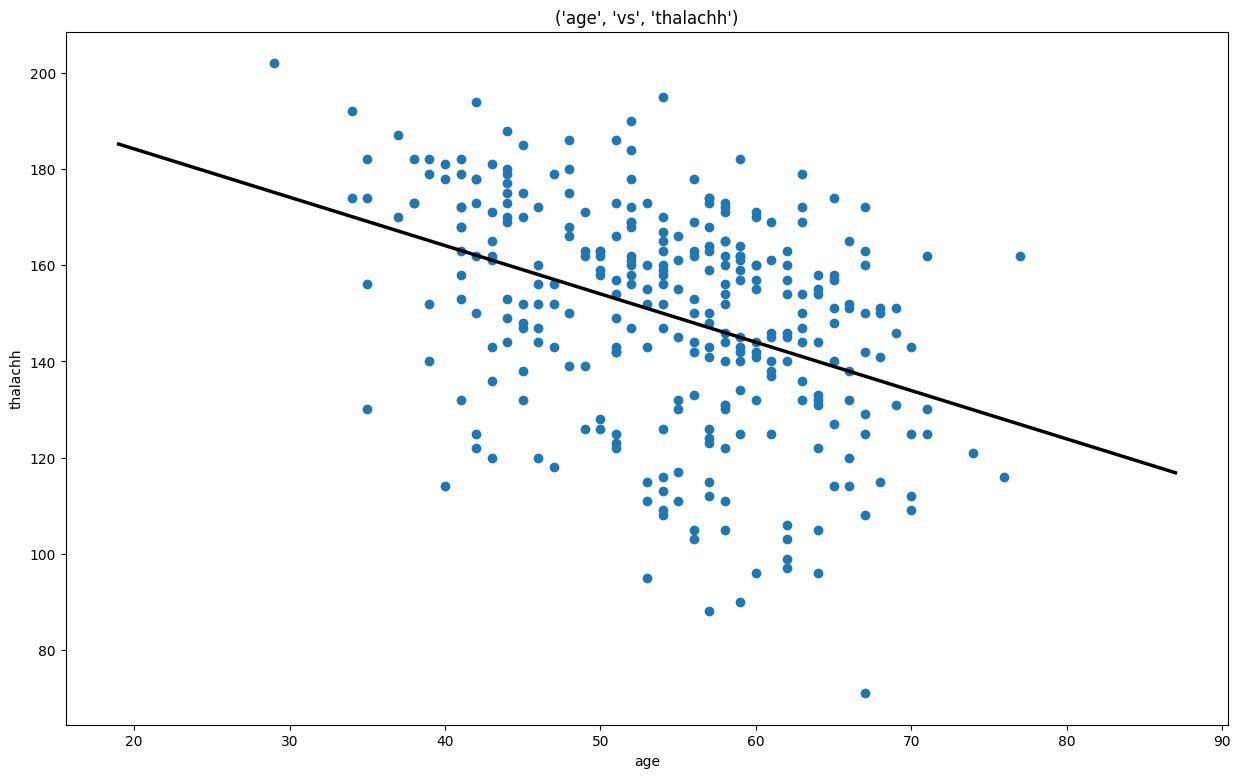

In [161]:
scatterplot(df=heartAttack,atributo1="age", atributo2="thalachh")